In [197]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [198]:
def convert(img):
    r,c,h = np.shape(img)
    temp = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            temp[i][j] = img[i][j][0]
    return temp

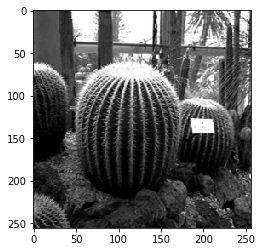

In [215]:
img1 = mpimg.imread('left.png')
img1 = convert(img1)
imgplot_1 = plt.imshow(img1,cmap=plt.cm.gray)

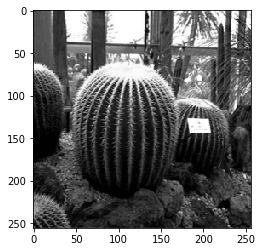

In [216]:
img2 = mpimg.imread('right.png')
img2 = convert(img2)
imgplot_2 = plt.imshow(img2,cmap=plt.cm.gray)

In [217]:
#Parameters in Compatibility function
delta = 0.01
gamma = 10
sigma = 0.5

In [218]:
#Compatibility function for a particular disparity at pixel
def psi_node(sigma,i,j,d1):
    temp = img1[i][j] - img2[i][j+d1]
    #print('1',temp)
    temp = temp**2
    temp =  -temp/((sigma**2)*2)
    temp = np.exp(temp)
    #print(temp)
    return temp

In [219]:
#Compatibility function for two nodes at given disparities
def psi_nodes(gamma,delta,d1,d2):
    temp = min((d1-d2)**2,delta**2)
    temp = -temp/((gamma**2)*2)
    temp = np.exp(temp)
    return temp

In [220]:
#Calculates marginal for a particular value of disparity at a given pixel location
def mu(i,j,d1,sigma,gamma,delta):
    neigh = [[-1,-1],[-1,0],[-1,1],[0,-1],[1,-1],[1,0],[1,1],[0,1]]
    temp1 = psi_node(sigma,i,j,d1)
    temp2 = 1
    for n in range(8):
        temp3 = 0
        for d2 in range(10):
            temp3 += psi_node(sigma,i+neigh[n][0],j+neigh[n][1],d2)*psi_nodes(gamma,delta,d1,d2)
        temp2 = temp2*temp3
    return temp1*temp2

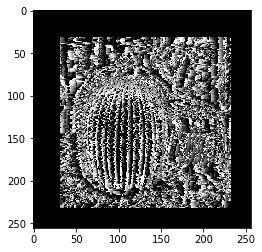

In [221]:
#Considering 200x200 Image as input for disparity calculations
li = np.zeros((256,256,10))
out = np.zeros((256,256))
for i in range(32,232):
    for j in range(32,232):
        for d in range(10):
            li[i][j][d] = mu(i,j,d,sigma,gamma,delta)
        out[i][j] = np.argmax(li[i][j])
        out[i][j] = out[i][j]*(255/10)

imgplot_3 = plt.imshow(out,cmap=plt.cm.gray) 